## Quantium Virtual Internship - Retail Strategy and Analytics

We need to present a strategic recommendation to our client that is supported by data which she can then use for the upcoming category review. However, to do so, we need to analyse the data to understand the current purchasing trends and behaviours. The client is particularly interested in customer segments and their chip purchasing behaviour. Consider what metrics would help describe the customers’ purchasing behaviour.

### Task:

To get started, download the resource csv data files below and begin performing high-level data checks such as:

Creating and interpreting high-level summaries of the data
Finding outliers and removing these (if applicable)
Checking data formats and correcting (if applicable)

You will also want to derive extra features such as pack size and brand name from the data and define metrics of interest to enable you to draw insights on who spends on chips and what drives spends for each customer segment. Remember, our end goal is to form a strategy based on the findings to provide a clear recommendation to our client the Category Manager so make sure your insights can have a commercial application.

### Solution:

Import libraries and Loading datasets

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/Python Environment/Forage Quantium Job/Task 1/QVI_purchase_behaviour.xlsx'
file_path = '/content/drive/My Drive/Python Environment/Forage Quantium Job/Task 1/QVI_transaction_data.xlsx'

# Load the Excel files
qvi_purchase_behavior = pd.read_excel('/content/drive/My Drive/Python Environment/Forage Quantium Job/Task 1/QVI_purchase_behaviour.xlsx')
qvi_transaction_data = pd.read_excel('/content/drive/My Drive/Python Environment/Forage Quantium Job/Task 1/QVI_transaction_data.xlsx')


Mounted at /content/drive


Checking the datasets

In [3]:
print(qvi_purchase_behavior.head())
print(qvi_transaction_data.head())

print(qvi_purchase_behavior.columns)
print(qvi_transaction_data.columns)


   LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER
0            1000   YOUNG SINGLES/COUPLES          Premium
1            1002   YOUNG SINGLES/COUPLES       Mainstream
2            1003          YOUNG FAMILIES           Budget
3            1004   OLDER SINGLES/COUPLES       Mainstream
4            1005  MIDAGE SINGLES/COUPLES       Mainstream
    DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0  43390          1            1000       1         5   
1  43599          1            1307     348        66   
2  43605          1            1343     383        61   
3  43329          2            2373     974        69   
4  43330          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  
0    Natural Chip        Compny SeaSalt175g         2        6.0  
1                  CCs Nacho Cheese    175g         3        6.3  
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9  
3    Smiths Chip Thinly  S/Cream&On

Data Cleaning

In [4]:
# Check for null values in the purchase behavior dataset
null_values_purchase = qvi_purchase_behavior.isnull().sum()
print("Null values in QVI Purchase Behavior:\n", null_values_purchase)

# Check for null values in the transaction dataset
null_values_transaction = qvi_transaction_data.isnull().sum()
print("\nNull values in QVI Transaction Data:\n", null_values_transaction)


Null values in QVI Purchase Behavior:
 LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

Null values in QVI Transaction Data:
 DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64


In [5]:
# Check data types for both datasets
print("\nData types in QVI Purchase Behavior:\n", qvi_purchase_behavior.dtypes)
print("\nData types in QVI Transaction Data:\n", qvi_transaction_data.dtypes)


Data types in QVI Purchase Behavior:
 LYLTY_CARD_NBR       int64
LIFESTAGE           object
PREMIUM_CUSTOMER    object
dtype: object

Data types in QVI Transaction Data:
 DATE                int64
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_NAME          object
PROD_QTY            int64
TOT_SALES         float64
dtype: object


In [6]:
# Convert categorical columns
qvi_purchase_behavior['LIFESTAGE'] = qvi_purchase_behavior['LIFESTAGE'].astype('category')
qvi_purchase_behavior['PREMIUM_CUSTOMER'] = qvi_purchase_behavior['PREMIUM_CUSTOMER'].astype('category')


In [7]:
# Convert DATE columns

import pandas as pd
from datetime import datetime, timedelta

# Method to convert the 5-digit excel date numbers to datetime
# Using apply with a lambda function
qvi_transaction_data['DATE'] = qvi_transaction_data['DATE'].apply(lambda x: (datetime(1900, 1, 1) + timedelta(days=int(x))))

# Display the DataFrame to check the results
print(qvi_transaction_data)


             DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0      2018-10-19          1            1000       1         5   
1      2019-05-16          1            1307     348        66   
2      2019-05-22          1            1343     383        61   
3      2018-08-19          2            2373     974        69   
4      2018-08-20          2            2426    1038       108   
...           ...        ...             ...     ...       ...   
264831 2019-03-11        272          272319  270088        89   
264832 2018-08-15        272          272358  270154        74   
264833 2018-11-08        272          272379  270187        51   
264834 2018-12-29        272          272379  270188        42   
264835 2018-09-24        272          272380  270189        74   

                                       PROD_NAME  PROD_QTY  TOT_SALES  
0         Natural Chip        Compny SeaSalt175g         2        6.0  
1                       CCs Nacho Cheese    175g         3     

In [8]:
# Check for duplicates in both datasets
duplicates_purchase = qvi_purchase_behavior.duplicated().sum()
duplicates_transaction = qvi_transaction_data.duplicated().sum()

print(f"\nDuplicates in QVI Purchase Behavior: {duplicates_purchase}")
print(f"Duplicates in QVI Transaction Data: {duplicates_transaction}")


Duplicates in QVI Purchase Behavior: 0
Duplicates in QVI Transaction Data: 1


In [ ]:
# Remove duplicates
qvi_purchase_behavior.drop_duplicates(inplace=True)
qvi_transaction_data.drop_duplicates(inplace=True)

In [9]:
# Identify outliers in TOT_SALES column
Q1 = qvi_transaction_data['TOT_SALES'].quantile(0.25)
Q3 = qvi_transaction_data['TOT_SALES'].quantile(0.75)
IQR = Q3 - Q1

# Define criteria for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


In [10]:
# Filter out outliers
qvi_transaction_data_cleaned = qvi_transaction_data[(qvi_transaction_data['TOT_SALES'] >= lower_bound) & (qvi_transaction_data['TOT_SALES'] <= upper_bound)]

Merging Datasets

In [11]:

merged_dataset = pd.merge(qvi_purchase_behavior, qvi_transaction_data_cleaned, on='LYLTY_CARD_NBR', how='inner')

# the shape and a sample of the merged dataset
print(f"Merged Dataset Shape: {merged_dataset.shape}")
print(merged_dataset.head())


Merged Dataset Shape: (264258, 10)
   LYLTY_CARD_NBR              LIFESTAGE PREMIUM_CUSTOMER       DATE  \
0            1000  YOUNG SINGLES/COUPLES          Premium 2018-10-19   
1            1002  YOUNG SINGLES/COUPLES       Mainstream 2018-09-18   
2            1003         YOUNG FAMILIES           Budget 2019-03-09   
3            1003         YOUNG FAMILIES           Budget 2019-03-10   
4            1004  OLDER SINGLES/COUPLES       Mainstream 2018-11-04   

   STORE_NBR  TXN_ID  PROD_NBR                               PROD_NAME  \
0          1       1         5  Natural Chip        Compny SeaSalt175g   
1          1       2        58   Red Rock Deli Chikn&Garlic Aioli 150g   
2          1       3        52   Grain Waves Sour    Cream&Chives 210G   
3          1       4       106  Natural ChipCo      Hony Soy Chckn175g   
4          1       5        96          WW Original Stacked Chips 160g   

   PROD_QTY  TOT_SALES  
0         2        6.0  
1         1        2.7  
2         1 

**Data Analysis and Data Visualizations**

Total sales analysis with respect to LIFESTAGE, PREMIUM_CUSTOMER, and PROD_NAME

In [12]:

# Group by LIFESTAGE and calculate total sales
sales_by_lifestage = merged_dataset.groupby('LIFESTAGE')['TOT_SALES'].sum().reset_index()

# Group by PREMIUM_CUSTOMER and calculate total sales
sales_by_premium_customer = merged_dataset.groupby('PREMIUM_CUSTOMER')['TOT_SALES'].sum().reset_index()

# Group by PROD_NAME and calculate total sales
sales_by_product = merged_dataset.groupby('PROD_NAME')['TOT_SALES'].sum().reset_index()

# Display the results
print("Total Sales by LIFESTAGE:")
print(sales_by_lifestage)
print("\nTotal Sales by PREMIUM_CUSTOMER:")
print(sales_by_premium_customer)
print("\nTotal Sales by PROD_NAME:")
print(sales_by_product)


Total Sales by LIFESTAGE:
                LIFESTAGE  TOT_SALES
0  MIDAGE SINGLES/COUPLES  183582.95
1            NEW FAMILIES   50253.10
2          OLDER FAMILIES  349945.25
3   OLDER SINGLES/COUPLES  399971.15
4                RETIREES  364567.65
5          YOUNG FAMILIES  314096.85
6   YOUNG SINGLES/COUPLES  259340.00

Total Sales by PREMIUM_CUSTOMER:
  PREMIUM_CUSTOMER  TOT_SALES
0           Budget  671985.80
1       Mainstream  746475.85
2          Premium  503295.30

Total Sales by PROD_NAME:
                                  PROD_NAME  TOT_SALES
0                         Burger Rings 220g     6831.0
1                  CCs Nacho Cheese    175g     5961.9
2                         CCs Original 175g     6048.0
3                  CCs Tasty Cheese    175g     6069.0
4            Cheetos Chs & Bacon Balls 190g     9226.8
..                                      ...        ...
109  WW Sour Cream &OnionStacked Chips 160g     5323.8
110     WW Supreme Cheese   Corn Chips 200g     5390.3
11

<ipython-input-12-bcc33335e6f2>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_by_lifestage = merged_dataset.groupby('LIFESTAGE')['TOT_SALES'].sum().reset_index()
<ipython-input-12-bcc33335e6f2>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_by_premium_customer = merged_dataset.groupby('PREMIUM_CUSTOMER')['TOT_SALES'].sum().reset_index()


<ipython-input-13-fba6c7fc0ead>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TOT_SALES', y='LIFESTAGE', data=sales_by_lifestage_sorted,


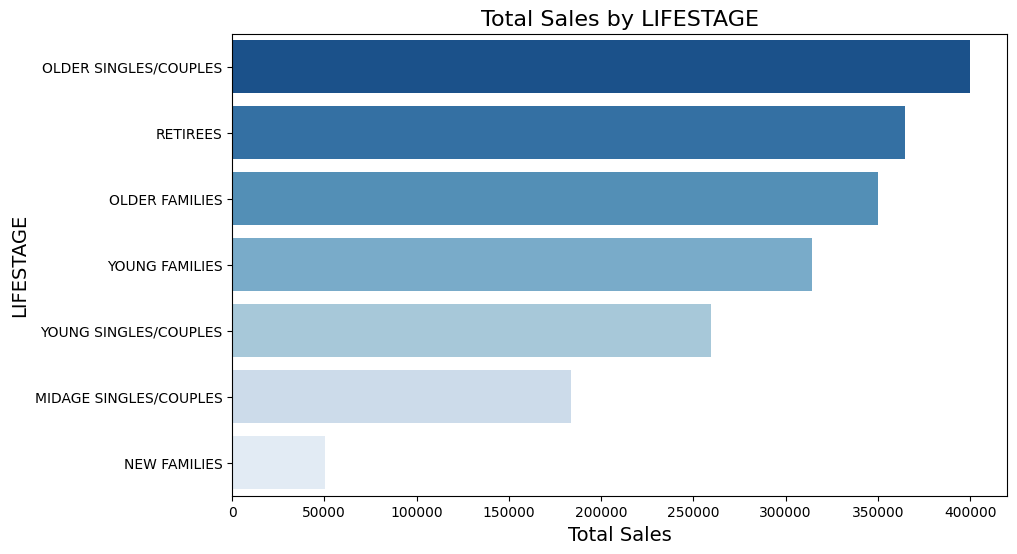

In [13]:
# Sort the DataFrame by total sales
sales_by_lifestage_sorted = sales_by_lifestage.sort_values(by='TOT_SALES', ascending=False)

# Create the bar plot for Total Sales by LIFESTAGE
plt.figure(figsize=(10, 6))

# Use a gradient color palette from light blue to dark blue
sns.barplot(x='TOT_SALES', y='LIFESTAGE', data=sales_by_lifestage_sorted,
            palette=sns.color_palette("Blues_r", n_colors=len(sales_by_lifestage_sorted)),
            order=sales_by_lifestage_sorted['LIFESTAGE'])

# Set the title and labels
plt.title('Total Sales by LIFESTAGE', fontsize=16)
plt.xlabel('Total Sales', fontsize=14)
plt.ylabel('LIFESTAGE', fontsize=14)

# Show the plot
plt.show()


<ipython-input-23-ff91583a280b>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TOT_SALES', y='PROD_NAME', data=top_products,


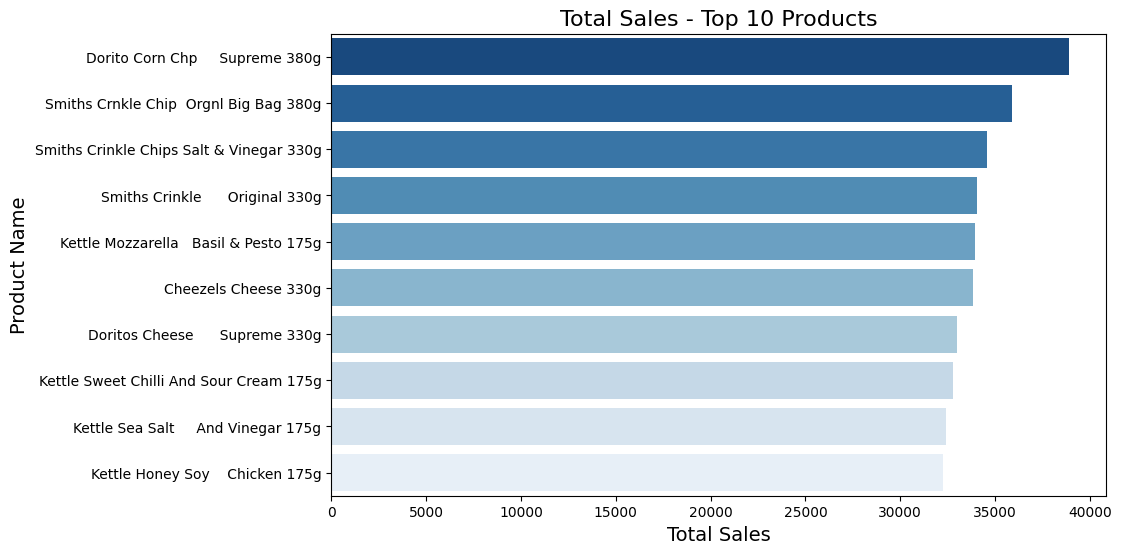

In [23]:
# Get the top 10 products
top_products = sales_by_product.sort_values(by='TOT_SALES', ascending=False).head(10)

# Create the bar plot for Total Sales by PRODUCT NAME (Top 10)
plt.figure(figsize=(10, 6))

# Use a simple color palette
sns.barplot(x='TOT_SALES', y='PROD_NAME', data=top_products,
            palette='Blues_r')

# Set the title and labels
plt.title('Total Sales - Top 10 Products', fontsize=16)
plt.xlabel('Total Sales', fontsize=14)
plt.ylabel('Product Name', fontsize=14)

# Show the plot
plt.show()


<ipython-input-24-39a671b1083b>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TOT_SALES', y='PROD_NAME', data=bottom_products,


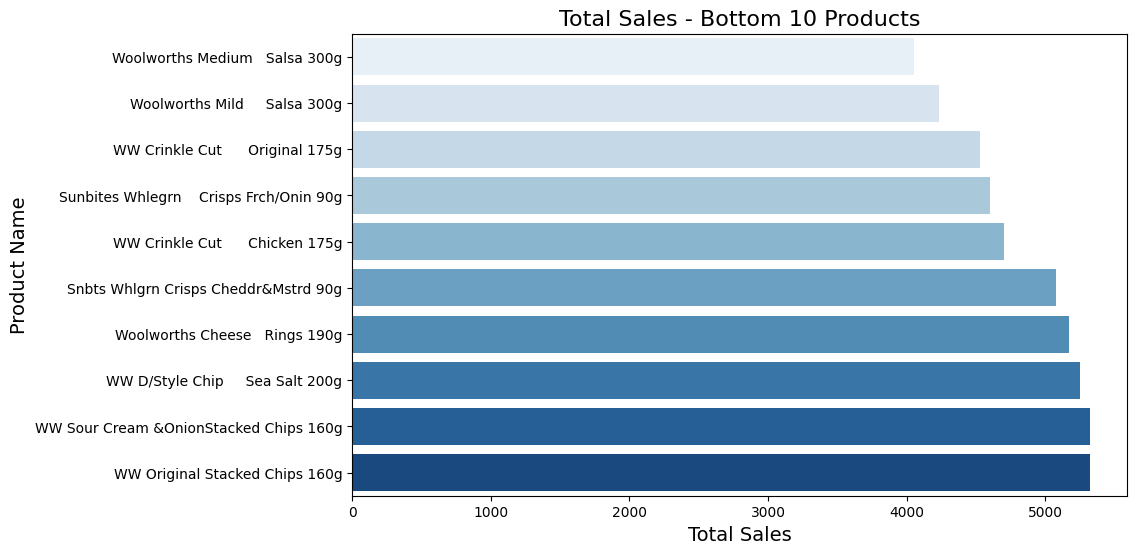

In [24]:
# Get the bottom 10 products
bottom_products = sales_by_product.sort_values(by='TOT_SALES', ascending=True).head(10)

# Create the bar plot for Total Sales by PRODUCT NAME (Bottom 5)
plt.figure(figsize=(10, 6))

# Use a simple color palette
sns.barplot(x='TOT_SALES', y='PROD_NAME', data=bottom_products,
            palette='Blues')

# Set the title and labels
plt.title('Total Sales - Bottom 10 Products', fontsize=16)
plt.xlabel('Total Sales', fontsize=14)
plt.ylabel('Product Name', fontsize=14)

# Show the plot
plt.show()


<ipython-input-20-4f55df915ff9>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = merged_dataset.resample('M', on='DATE')['TOT_SALES'].sum().reset_index()
<ipython-input-20-4f55df915ff9>:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_sales_combined = monthly_sales.groupby('Month')['TOT_SALES'].sum().reset_index()


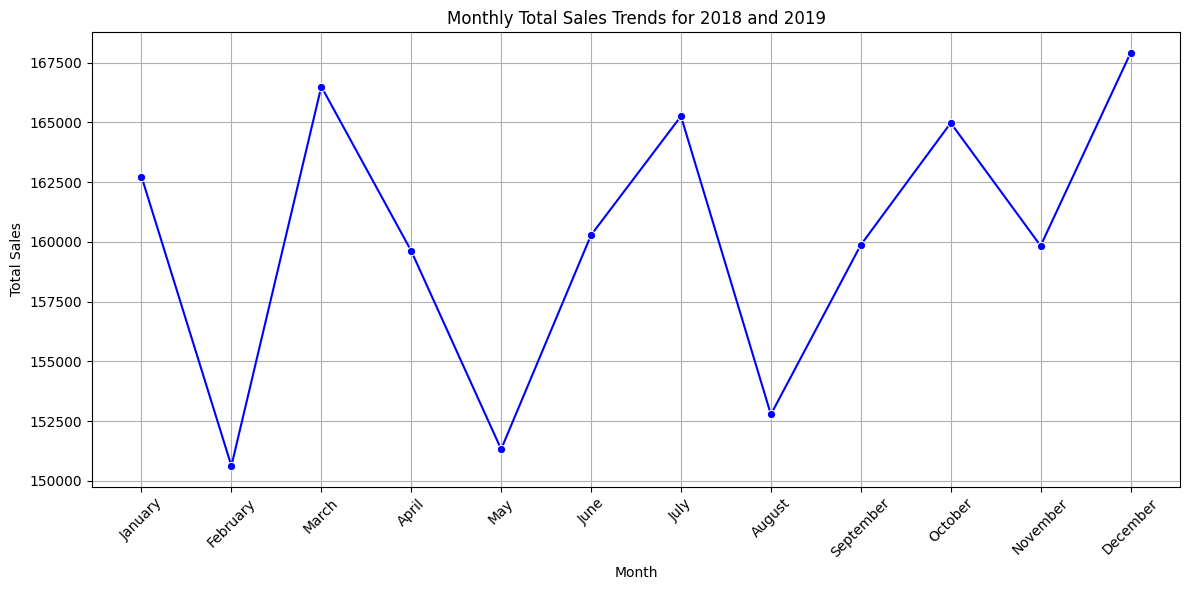

In [20]:
# Create a new DataFrame with the total sales aggregated by month and year
monthly_sales = merged_dataset.resample('M', on='DATE')['TOT_SALES'].sum().reset_index()
monthly_sales['Year'] = monthly_sales['DATE'].dt.year
monthly_sales['Month'] = monthly_sales['DATE'].dt.month_name()  # Month names

# Filter only for the years 2018 and 2019
monthly_sales = monthly_sales[monthly_sales['Year'].isin([2018, 2019])]

# Set the order for months from January to December
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# Convert 'Month' to a categorical type with the specified order
monthly_sales['Month'] = pd.Categorical(monthly_sales['Month'], categories=month_order, ordered=True)

# Group by Month and sum sales for both years
monthly_sales_combined = monthly_sales.groupby('Month')['TOT_SALES'].sum().reset_index()

# Create a Month-Year column for plotting
monthly_sales_combined['Month_Year'] = monthly_sales_combined['Month'].astype(str) + ' ' + '2018-2019'

# Plotting the results
plt.figure(figsize=(12, 6))

# Plotting a single line for combined sales data
sns.lineplot(data=monthly_sales_combined, x='Month', y='TOT_SALES', marker='o', color='blue')

# Formatting the plot
plt.title('Monthly Total Sales Trends for 2018 and 2019')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()

# Show the plot
plt.show()

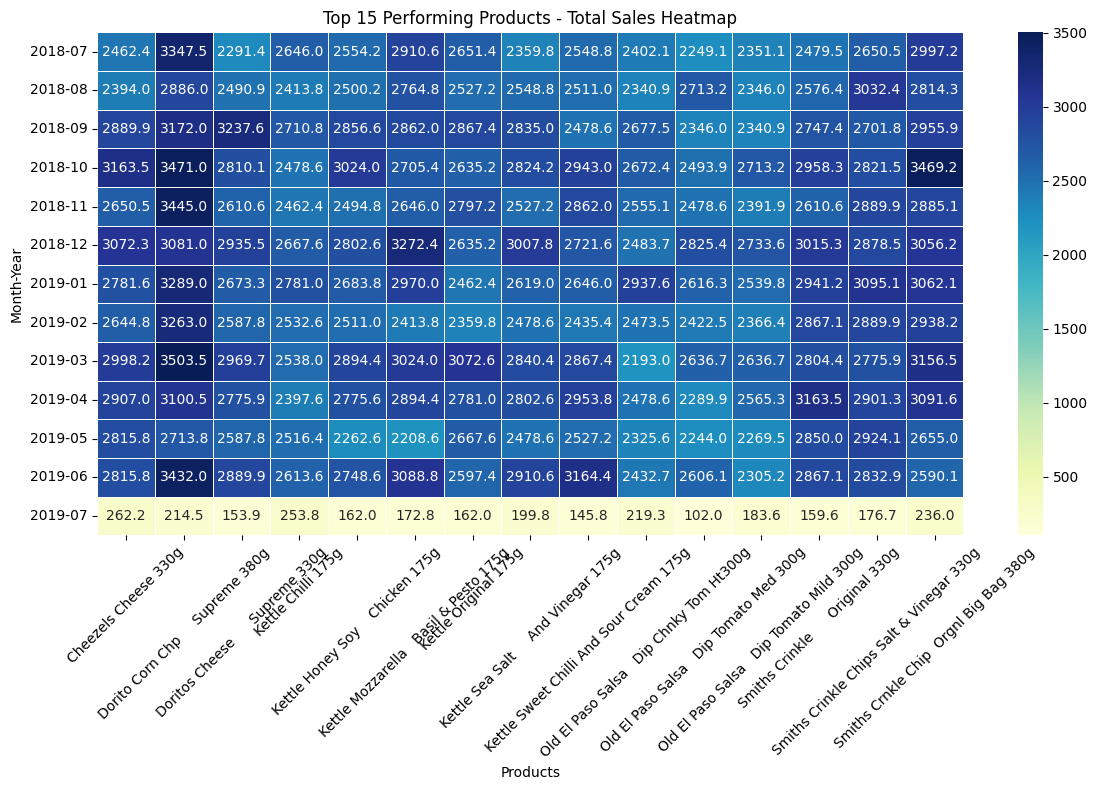

In [22]:
# Grouping by product and summing the total sales to get overall performance
product_performance = merged_dataset.groupby('PROD_NAME')['TOT_SALES'].sum().reset_index()

# Sorting and selecting the top 15 products
top_products = product_performance.sort_values(by='TOT_SALES', ascending=False).head(15)

# Create a new column for the month-year format
merged_dataset['Month_Year'] = merged_dataset['DATE'].dt.to_period('M')

# Filtering the merged dataset to only include top products
top_products_sales = merged_dataset[merged_dataset['PROD_NAME'].isin(top_products['PROD_NAME'])]

# Aggregating monthly sales for the top products
heatmap_data = top_products_sales.groupby(['Month_Year', 'PROD_NAME'])['TOT_SALES'].sum().unstack(fill_value=0)

# Plotting the heatmap
plt.figure(figsize=(12, 8))

# Create a heatmap
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='.1f', linewidths=.5)
plt.title('Top 15 Performing Products - Total Sales Heatmap')
plt.xlabel('Products')
plt.ylabel('Month-Year')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

<ipython-input-27-96a695aa795a>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lifestage_sales = merged_dataset.groupby('LIFESTAGE')['TOT_SALES'].sum().reset_index()


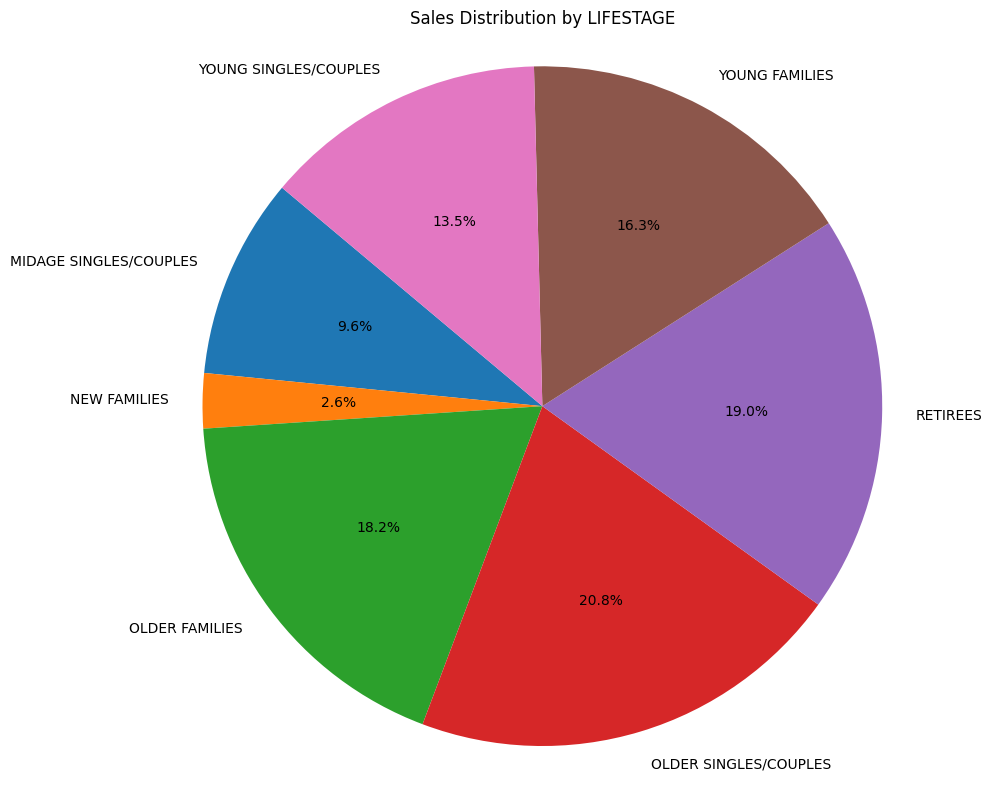

In [27]:
# Group by LIFESTAGE and sum the total sales
lifestage_sales = merged_dataset.groupby('LIFESTAGE')['TOT_SALES'].sum().reset_index()

# Create a pie chart
plt.figure(figsize=(10, 8))
plt.pie(lifestage_sales['TOT_SALES'], labels=lifestage_sales['LIFESTAGE'], autopct='%1.1f%%', startangle=140)
plt.title('Sales Distribution by LIFESTAGE')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

<ipython-input-30-7c6c1aafca00>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_sales_comparative = merged_dataset.groupby(['Month_Year', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().unstack(fill_value=0)


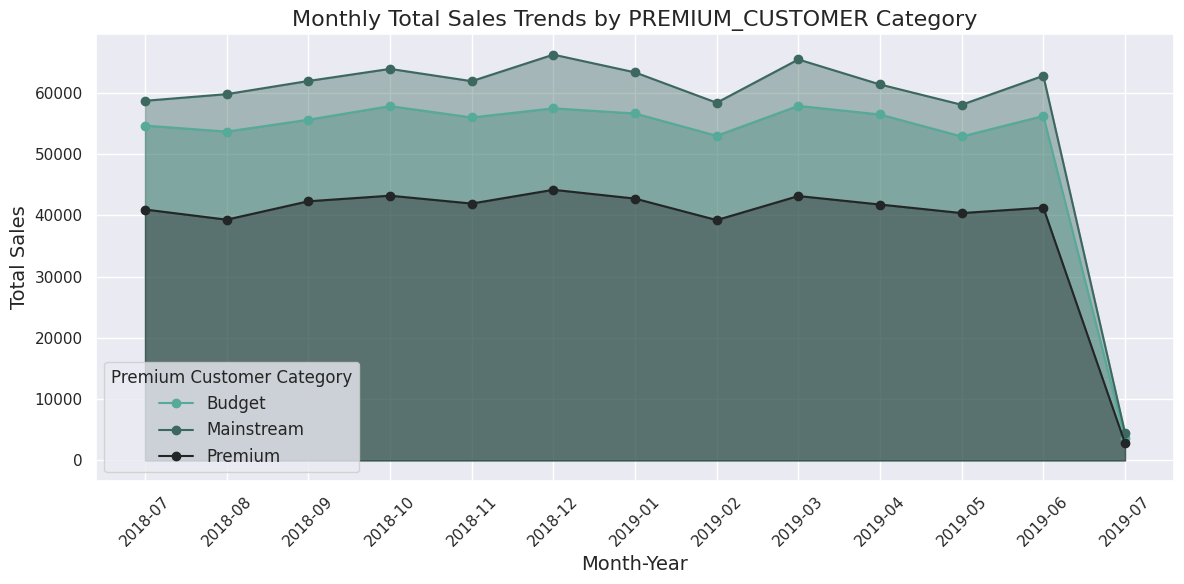

In [30]:
merged_dataset['Month_Year'] = merged_dataset['DATE'].dt.to_period('M')

# Aggregating monthly sales by PREMIUM_CUSTOMER category
monthly_sales_comparative = merged_dataset.groupby(['Month_Year', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().unstack(fill_value=0)

# Reset the index for plotting
monthly_sales_comparative = monthly_sales_comparative.reset_index()

# Set a dark grid style
sns.set(style='darkgrid')

# Plotting the results
plt.figure(figsize=(12, 6))

# Using deeper colors for better visibility
colors = sns.color_palette("dark:#5A9_r", len(monthly_sales_comparative.columns) - 1)

# Plotting each category with a line and fill
for i, category in enumerate(monthly_sales_comparative.columns[1:]):
    plt.plot(monthly_sales_comparative['Month_Year'].astype(str),
             monthly_sales_comparative[category],
             marker='o',
             color=colors[i],
             label=category)

    # Fill under the lines
    plt.fill_between(monthly_sales_comparative['Month_Year'].astype(str),
                     monthly_sales_comparative[category],
                     color=colors[i],
                     alpha=0.4)  # Increase alpha for more visibility

# Formatting the plot
plt.title('Monthly Total Sales Trends by PREMIUM_CUSTOMER Category', fontsize=16)
plt.xlabel('Month-Year', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Premium Customer Category', fontsize=12)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


## Key Findings for Each Analysis:

### Data Cleaning and Preparation:
1. Data Integrity:
No null values were present in the datasets.
Duplicates were minimal (only one duplicate in the transaction dataset).

2. Outlier Removal:
Identified and removed outliers from the TOT_SALES column using the IQR method.

3. Data Merging:
Datasets were merged on LYLTY_CARD_NBR, resulting in 264,258 entries.

4. Feature Engineering:
Converted dates from numerical format to datetime and categorized lifestage and premium customer columns.

### Analysis Highlights:

1. Total Sales by Lifestage:
Older Singles/Couples generated the highest sales (399,971.15 units).
Other significant contributors included Older Families and Retirees.

2. Total Sales by Premium Customer Category:
Mainstream customers contributed the most sales (746,475.85 units), followed by Budget (671,985.80 units) and Premium (503,295.30 units).

3. Product Performance:
Top products included Natural Chip Company Sea Salt 175g and CCs Nacho Cheese 175g.
The bottom-performing products were mostly niche or less popular variants.

4. Monthly Sales Trends:
Steady sales trends across 2018-2019, with peaks during specific months such as December (likely due to seasonal demand).

5. Sales Distribution by Lifestage:
Older demographic groups formed the bulk of sales, aligning with the trend observed in total sales by lifestage.

6. Monthly Sales Comparison by Customer Category:
Budget and Mainstream categories showed more consistent performance compared to Premium customers, which had sporadic peaks.

7. Top Product Sales Heatmap:
Certain products showed seasonal trends, peaking during festive periods.

### Summary/Highlights:
Older demographics are the primary contributors to chip sales, especially in the Mainstream and Budget segments.
Product preference varies, with a clear inclination toward popular chip brands like Natural Chip Co. and CCs.
Seasonal trends suggest the importance of strategic promotions during high-demand months like December.
The data provides actionable insights for targeted marketing strategies, such as focusing on Older Families and Singles in the Budget and Mainstream categories for maximum ROI.